In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [ ]:
dados = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dados.data, dados.target, test_size=0.1, random_state=42, stratify=dados.target)

In [ ]:
modelo = LogisticRegression(multi_class='auto', solver='lbfgs', random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
matrix

array([[5, 0, 0],
       [0, 4, 1],
       [0, 0, 5]])

In [ ]:
Acuracia = np.sum(np.diagonal(matrix))/np.sum(matrix)
print(f'A acurácia é: {Acuracia}')

A acurácia é: 0.9333333333333333


In [ ]:
precision = []
for i in range(0, len(matrix[0])):
  precision.append(matrix[i, i] / np.sum(matrix[:,i]))

print(f'A precisão é: {precision}')

A precisão é: [1.0, 1.0, 0.8333333333333334]


In [ ]:
Recall = []
for i in range(0, len(matrix[0])):
  Recall.append(matrix[i, i] / np.sum(matrix[i,:]))

print(f'O recall é: {precision}')

O recall é: [1.0, 1.0, 0.8333333333333334]


In [ ]:
F1 = []
for i in range(0, len(precision)):
  F1.append(2*precision[i]*Recall[i]/(precision[i]+Recall[i]))

print(f'O F1 score é: {F1}')

O F1 score é: [1.0, 0.888888888888889, 0.9090909090909091]


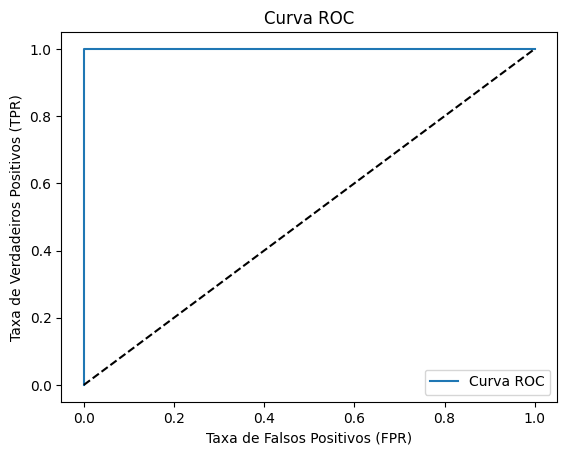

In [ ]:
y_score = modelo.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score[:,2], pos_label=2)
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], 'k--',)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
roc_auc_score(y_true=y_test, y_score=y_score, multi_class='ovo')

1.0